<a href="https://colab.research.google.com/github/booluckgmie/training/blob/main/DOSMT2023_WebCrawling_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents : Web Crawling and Web Scraping

*   Introduction
*   Setup/ Installation
*   Web Crawling
*   Web Scraping (table/html) / Extract (excel)
*   Looping
*   Store (csv/github)





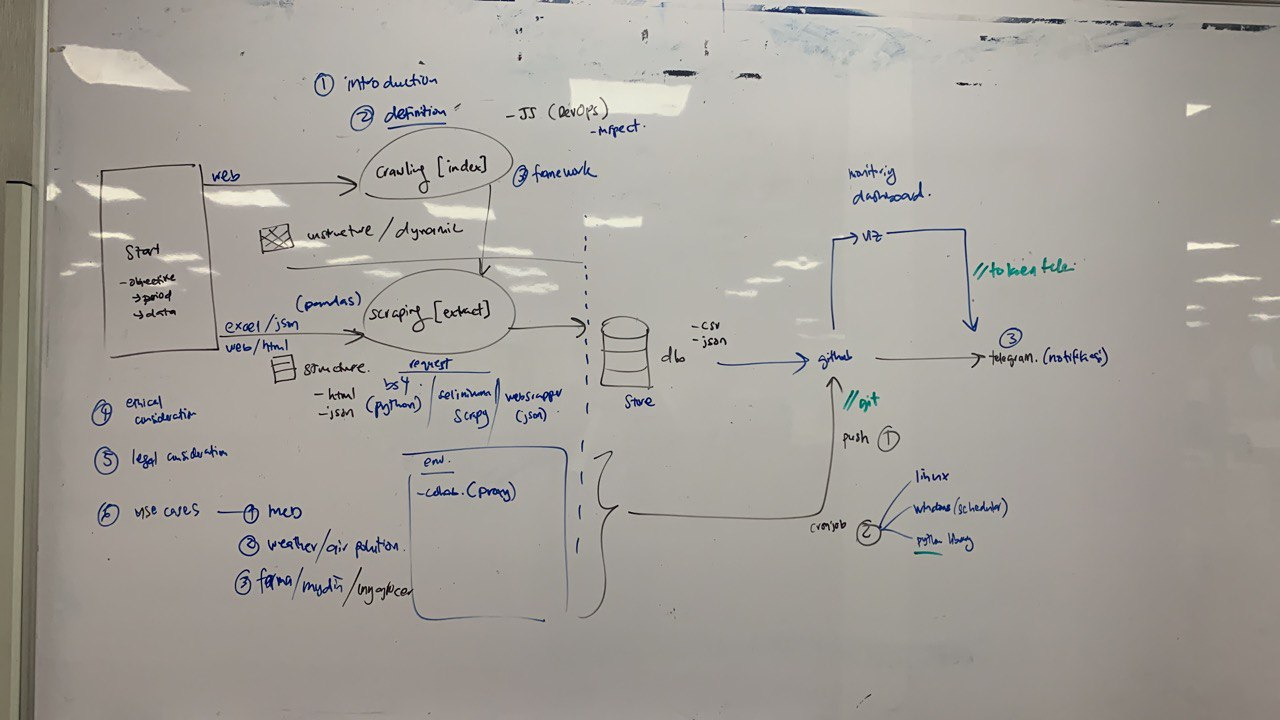

# Introduction
- definition
- framework
- ethical consideration
- legal consideration
- use cases

---

## What is Web Crawling?
- Web crawling is the process of systematically browsing the internet to index and collect information from websites.
- It's commonly used by search engines like Google to index web pages.

## What is Web Scraping?
- Web scraping is the process of extracting specific data from web pages.
- It involves parsing HTML content and extracting information of interest.


---

## Python Libraries for Web Crawling
- Popular libraries: requests, urllib, BeautifulSoup
- Advanced tool: Scrapy

## Example: Basic Web Crawler


```python
import requests
from bs4 import BeautifulSoup

url = 'https://example.com'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract links from the page
links = [link['href'] for link in soup.find_all('a')]
```



## Example: Web Scraping with BeautifulSoup



```python
import requests
from bs4 import BeautifulSoup

url = 'https://example.com'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the page title
title = soup.title.string

# Extract all paragraphs
paragraphs = [p.get_text() for p in soup.find_all('p')]

```
---


## Ethical Considerations
## Ethics of Web Scraping

*   Respect website's terms of service
*   Avoid overloading servers with requests
*   Do not scrape sensitive or personal data
*   Follow ethical guidelines and laws


---



## Legal Considerations
## Legal Aspects of Web Scraping
*   Some websites prohibit scraping in their terms of use.
*   Consult legal counsel if unsure.
*   Always attribute data sources when required.

---

# Use case MOTAC : Registration Tourist Accommodation Premises

Sumber :
https://motac.gov.my/en/check/registered-hotel?s=&n=&v=0 <br>

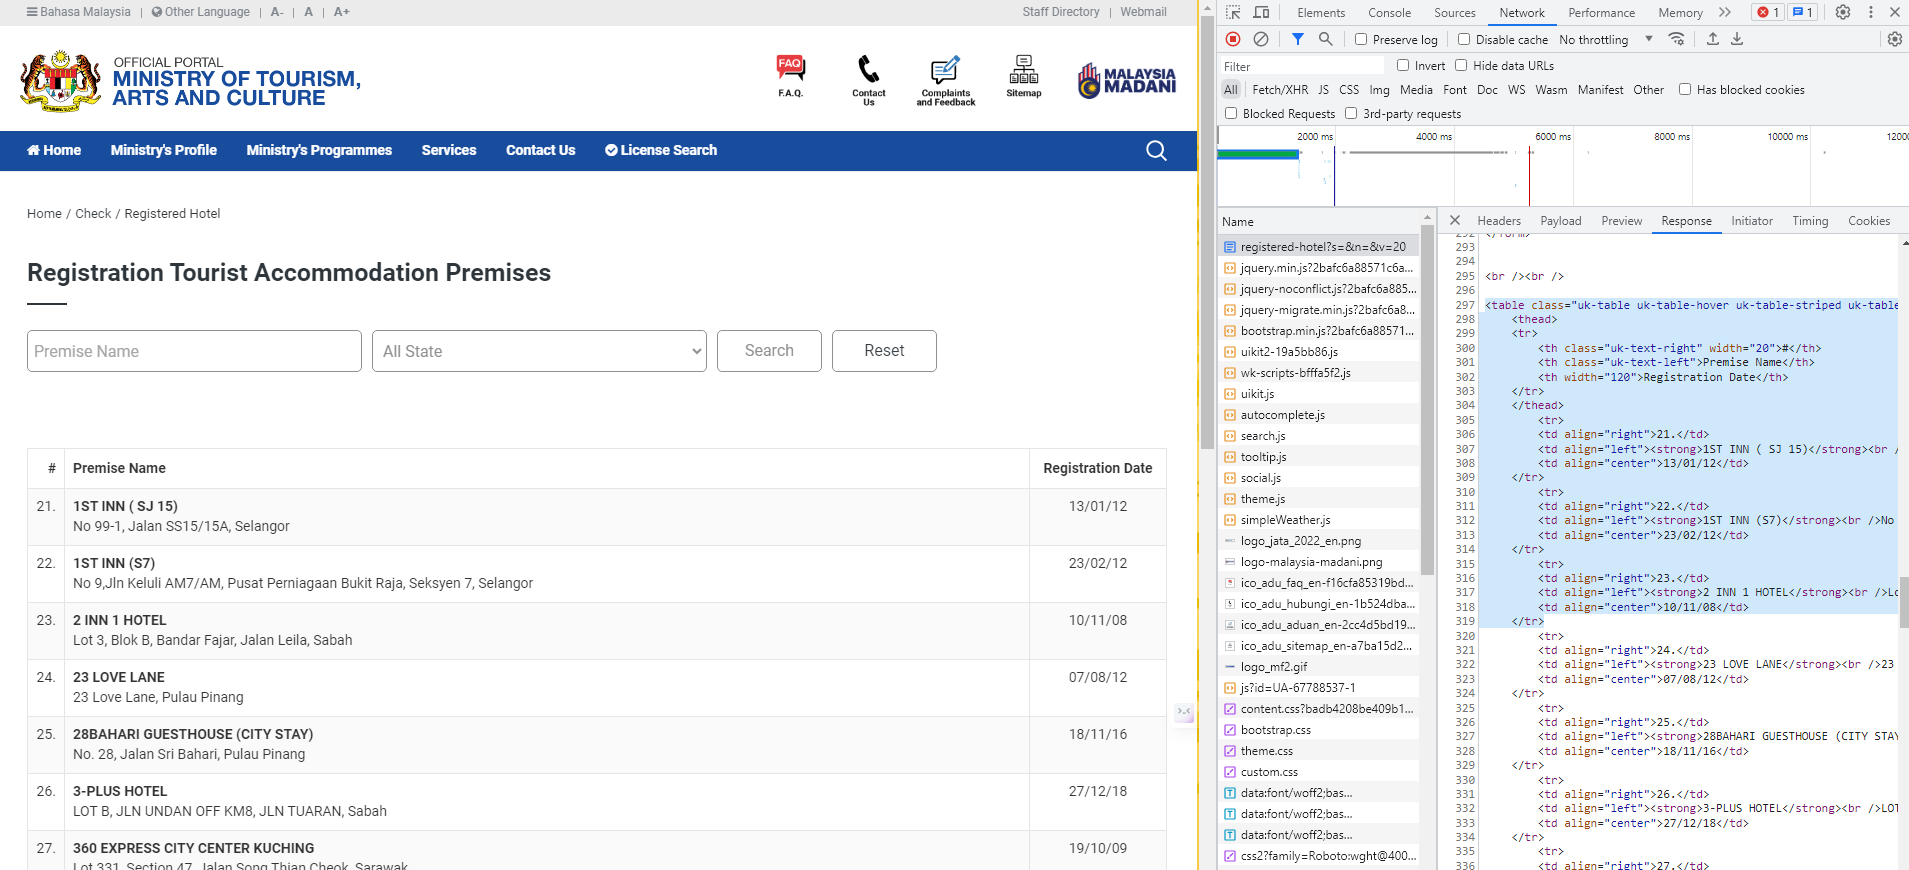

In [ ]:
from IPython.display import Image, display

# # Replace 'image2.png' with the full path if it's in a different directory
# image_path = 'image1.png'
image_path = '/content/drive/MyDrive/imagesDOSMT2023/image1.png'

# # Display the image
display(Image(filename=image_path))

# URL of the image
# image_url = 'https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/image1.png'

# Display the image
# display(Image(url=image_url))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installation Libraries

In [ ]:
!pip install requests --quiet
!pip install bs4 --quiet

## Identify Output

objective : https://chat.openai.com/share/f0f44203-35e6-4e17-99e7-e70563f1d7bd

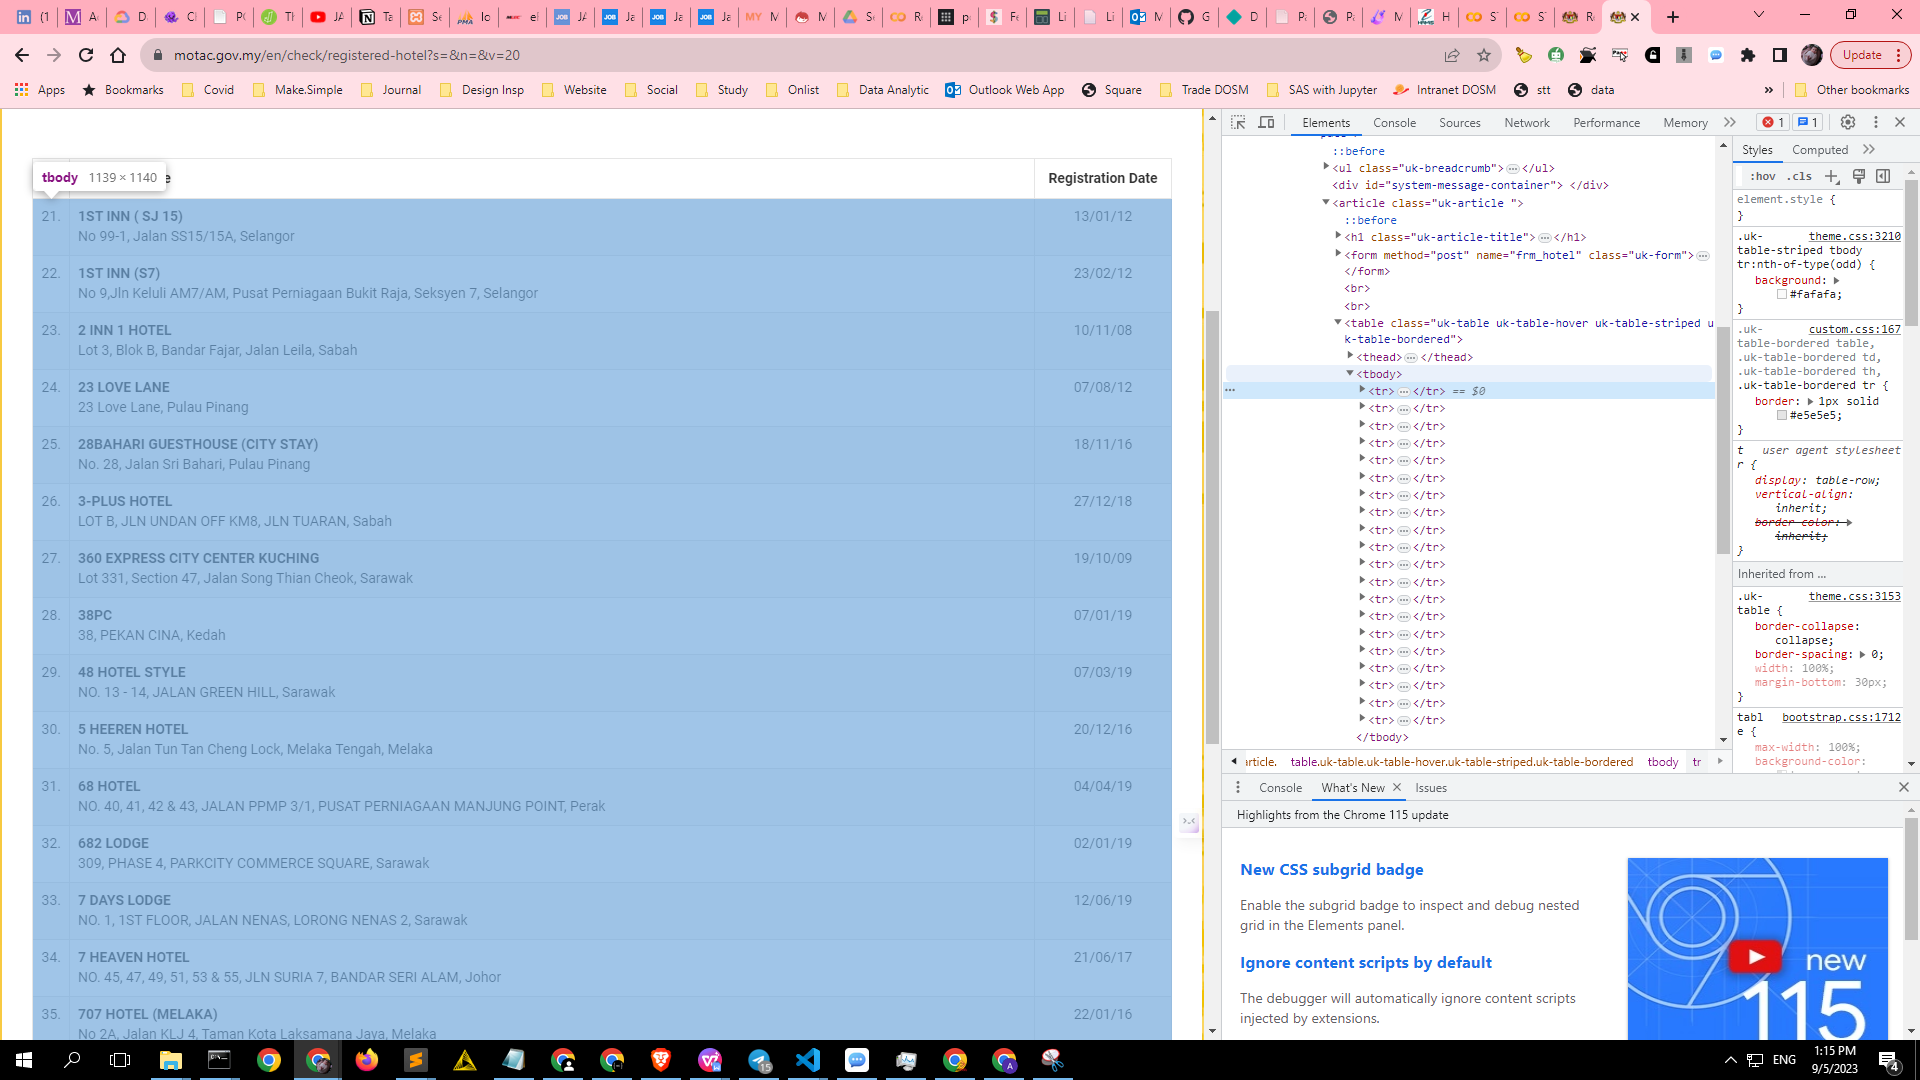

In [ ]:
# # URL of the image
# image_url = 'https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/image2.png'

# # Display the image
# display(Image(url=image_url))

image_path = '/content/drive/MyDrive/imagesDOSMT2023/image2.png'

# # Display the image
display(Image(filename=image_path))


## DevTools (Inspect/Console)

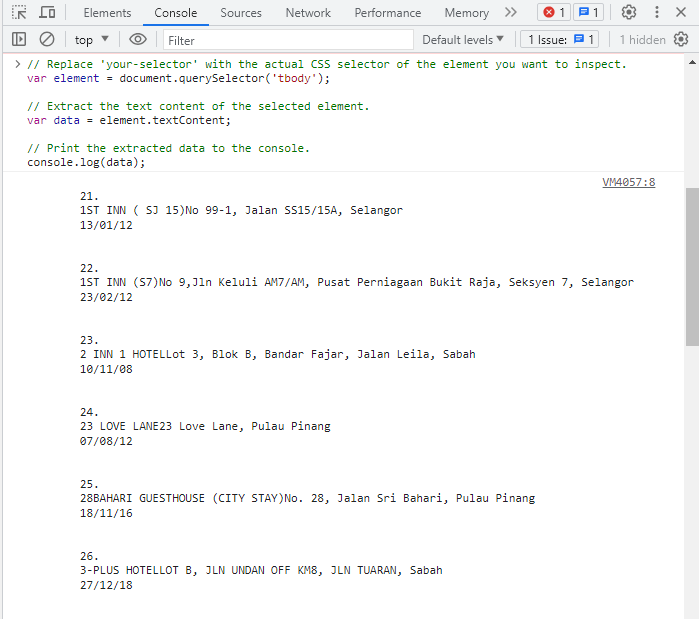

In [ ]:
# # URL of the image
# image_url = 'https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/image3.png'

# # Display the image
# display(Image(url=image_url))

image_path = '/content/drive/MyDrive/imagesDOSMT2023/image3.png'

# # Display the image
display(Image(filename=image_path))




```javascript
#// Replace 'your-selector' with the actual CSS selector of the element you want to inspect.
var element = document.querySelector('tbody');

#// Extract the text content of the selected element.
var data = element.textContent;

#// Print the extracted data to the console.
console.log(data);
```



## Network > HTML file > Response > select > edit HTML

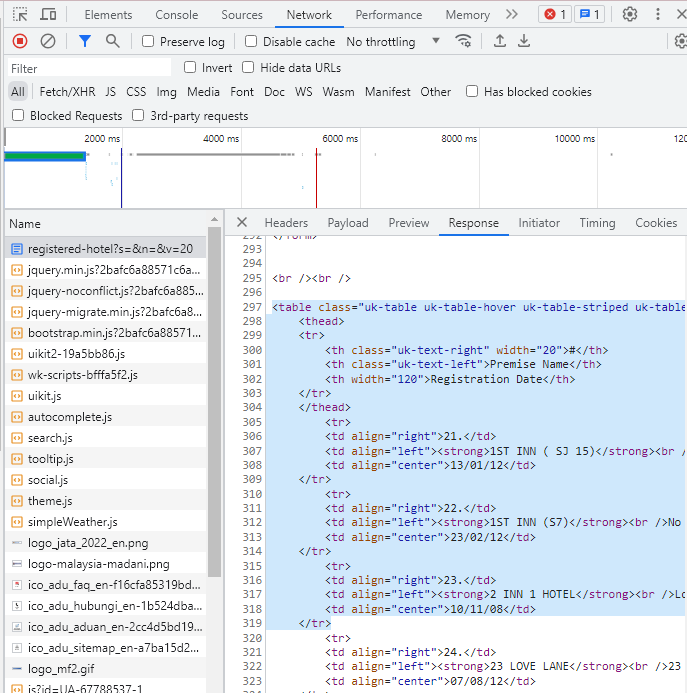

In [ ]:
# # URL of the image
# image_url = 'https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/image4.png'

# # Display the image
# display(Image(url=image_url))

image_path = '/content/drive/MyDrive/imagesDOSMT2023/image4.png'

# # Display the image
display(Image(filename=image_path))

# Crawl single data point/page

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://motac.gov.my/en/check/registered-hotel?s=&n=&v=4860'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'uk-table'})
if table is not None:
    rows = table.find_all('tr')

    # Iterate through the first 5 rows
    for i, row in enumerate(rows):
        if i < 5:
            columns = row.find_all('td')
            for column in columns:
                print(column.text)
        else:
            break


4861.
WALK INNLOT 1819, JALAN MERBAU, Sarawak
12/02/19
4862.
WAN DANISHA VILLA INN828, JALAN MASJID BAUNG BAYAM, Kelantan
07/05/19
4863.
WAN JIN HOTEL @ JALAN PUDUNO. 18, F.A.B.C. 18, LORONG BRUNEI 3, OFF JALAN PUDU, Wilayah Persekutuan Kuala Lumpur
17/05/19
4864.
WANG VALLEY RESORT88, JALAN TEMOYONG, MUKIM KEDAWANG, Kedah
04/04/19


# Scraping single data point

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Define the URL
url = 'https://motac.gov.my/en/check/registered-hotel?s=&n=&v=20'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the data
table = soup.find('table', class_='uk-table')

# Initialize lists to store data
premise_names = []
addresses = []
reg_dates = []

# Loop through the table rows and extract data
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    premise_names.append(columns[1].strong.get_text())
    address_text = columns[1].find_all('br')[0].next_sibling.strip()
    addresses.append(address_text)
    reg_dates.append(columns[2].get_text())

# Create a DataFrame
data = {'premise_name': premise_names, 'address': addresses, 'reg_date': reg_dates}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,premise_name,address,reg_date
0,1ST INN ( SJ 15),"No 99-1, Jalan SS15/15A, Selangor",13/01/12
1,1ST INN (S7),"No 9,Jln Keluli AM7/AM, Pusat Perniagaan Bukit...",23/02/12
2,2 INN 1 HOTEL,"Lot 3, Blok B, Bandar Fajar, Jalan Leila, Sabah",10/11/08
3,23 LOVE LANE,"23 Love Lane, Pulau Pinang",07/08/12
4,28BAHARI GUESTHOUSE (CITY STAY),"No. 28, Jalan Sri Bahari, Pulau Pinang",18/11/16


# Loop for 200 records
(20 records per page)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# define the URL format string with a placeholder for the v value
url_format = 'https://motac.gov.my/en/check/registered-hotel?s=&n=&v={v}'

# define the range of v values to loop over
# v_values = range(0, 4880, 20)
v_values = range(0, 200, 20)

# initialize an empty list to store the DataFrames
df_list = []

for v in v_values:
    # construct the URL for the current v value
    url = url_format.format(v=v)

    response = requests.get(url)
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the data
    table = soup.find('table', class_='uk-table')

    # Initialize lists to store data
    premise_names = []
    addresses = []
    reg_dates = []

    # Loop through the table rows and extract data
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        premise_names.append(columns[1].strong.get_text())
        address_text = columns[1].find_all('br')[0].next_sibling.strip()
        addresses.append(address_text)
        reg_dates.append(columns[2].get_text())

    # Create a DataFrame
    data = {'premise_name': premise_names, 'address': addresses, 'reg_date': reg_dates}
    df = pd.DataFrame(data)
    df_list.append(df)

# concatenate the DataFrames into a single DataFrame
df_all = pd.concat(df_list, ignore_index=True)
df_all.head()


,premise_name,address,reg_date
0,1 CITY HOTEL,"Lot 1,2,3, Block B, Segama Kompleks, Sabah",01/11/11
1,1 HOTEL TAMAN CONNAUGHT,"NO. 17, 17-1 & 17-2, JALAN MENARA GADING 1, TA...",24/06/22
2,1 MALAYSIA HOTEL,"Lot S0110-0115, Blok J, One Avenue, Phase 8, T...",15/12/09
3,1 MILLION HOTEL,"NO 2,6,8,10,12 & 16, Jalan Austin Height 8/6, ...",28/03/16
4,101 HOTEL,"LOT 1608, HOKKIEN ROAD, Sarawak",17/05/19


In [ ]:
# Extract the last word after the comma and store it in the 'state' column
df_all['state'] = df_all['address'].apply(lambda x: x.split(',')[-1].strip())
df_all.head()

,premise_name,address,reg_date,state
0,1 CITY HOTEL,"Lot 1,2,3, Block B, Segama Kompleks, Sabah",01/11/11,Sabah
1,1 HOTEL TAMAN CONNAUGHT,"NO. 17, 17-1 & 17-2, JALAN MENARA GADING 1, TA...",24/06/22,Wilayah Persekutuan Kuala Lumpur
2,1 MALAYSIA HOTEL,"Lot S0110-0115, Blok J, One Avenue, Phase 8, T...",15/12/09,Sabah
3,1 MILLION HOTEL,"NO 2,6,8,10,12 & 16, Jalan Austin Height 8/6, ...",28/03/16,Johor
4,101 HOTEL,"LOT 1608, HOKKIEN ROAD, Sarawak",17/05/19,Sarawak


In [ ]:
df_all.loc[4][1]

'LOT 1608, HOKKIEN ROAD, Sarawak'

# Save file to folder

In [ ]:
import os
import pandas as pd

# Create the 'output' folder if it doesn't exist
output_folder = '/content/output'
os.makedirs(output_folder, exist_ok=True)

# Save the DataFrame to the 'output' folder as 'reg_accom2.csv'
df_all.to_csv('/content/output/reg_accom2.csv', index=False)

Last updated : 05 Sept 2023

# Use case APIMS : API Pollution Malaysia

In [ ]:
# from IPython.display import Image, display
# image_url = 'https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/apims_ui.png'
# display(Image(url=image_url))

![apims_ui](https://raw.githubusercontent.com/booluckgmie/sharecode/master/imagesDOSMT2023/apims_ui.png)

In [ ]:
import pandas as pd
import requests

In [ ]:
r=requests.get("http://apims.doe.gov.my/data/public_v2/CAQM/last24hours.json")

In [ ]:
payload = r.json()  # Parse `response.text` into JSON

#JSON
import pprint
pp = pprint.PrettyPrinter(indent=1)

# Print only the first 5 rows
for i, (key, value) in enumerate(payload.items()):
    if i >= 1:
        break
    pp.pprint({key: value})

print(pp)


{'24hour_api_apims': [['State',
                       'Location',
                       '10:00AM',
                       '11:00AM',
                       '12:00PM',
                       '1:00PM',
                       '2:00PM',
                       '3:00PM',
                       '4:00PM',
                       '5:00PM',
                       '6:00PM',
                       '7:00PM',
                       '8:00PM',
                       '9:00PM',
                       '10:00PM',
                       '11:00PM',
                       '12:00AM',
                       '1:00AM',
                       '2:00AM',
                       '3:00AM',
                       '4:00AM',
                       '5:00AM',
                       '6:00AM',
                       '7:00AM',
                       '8:00AM',
                       '9:00AM'],
                      ['PERLIS',
                       'Kangar',
                       '26**',
                       '27**',
      

In [ ]:
# DATAFRAME
import pandas as pd

data = pd.json_normalize(payload, record_path=['24hour_api_apims'])

# Assign the first row as the header
header = data.iloc[0]
data = data[1:]  # Exclude the first row from the data
data.columns = header  # Set the column names based on the first row

data.head()


,State,Location,10:00AM,11:00AM,12:00PM,1:00PM,2:00PM,3:00PM,4:00PM,5:00PM,...,12:00AM,1:00AM,2:00AM,3:00AM,4:00AM,5:00AM,6:00AM,7:00AM,8:00AM,9:00AM
1,PERLIS,Kangar,26**,27**,27**,23**,21**,20**,20**,19**,...,19**,20**,20**,20**,20**,20**,19**,19**,19**,20**
2,KEDAH,Langkawi,22**,22**,22**,18**,18**,18**,17**,16**,...,15**,15**,16**,15**,15**,15**,15**,14**,12**,12**
3,KEDAH,Alor Setar,28**,28**,26**,23**,21**,20**,20**,20**,...,23**,22**,23**,25**,25**,25**,24**,24**,24**,24**
4,KEDAH,Sungai Petani,53**,52**,50**,50**,50**,50**,49**,48**,...,44**,41**,36**,36**,35**,34**,33**,32**,31**,31**
5,KEDAH,Kulim Hi-Tech,49**,51**,50**,51**,52**,52**,53**,53**,...,47**,48**,48**,48**,46**,45**,44**,43**,43**,42**


In [ ]:
data.columns

Index(['State', 'Location', '10:00AM', '11:00AM', '12:00PM', '1:00PM',
       '2:00PM', '3:00PM', '4:00PM', '5:00PM', '6:00PM', '7:00PM', '8:00PM',
       '9:00PM', '10:00PM', '11:00PM', '12:00AM', '1:00AM', '2:00AM', '3:00AM',
       '4:00AM', '5:00AM', '6:00AM', '7:00AM', '8:00AM', '9:00AM'],
      dtype='object', name=0)

Melt to dataframe/tabular format

In [ ]:
# Melt the DataFrame to transform it into a tabular format
melted_df = pd.melt(data, id_vars=['State', 'Location'], var_name='hour', value_name='value')
from datetime import datetime

# Get the current date
current_date = datetime.today().date()

# Add the 'date' column with the current date
melted_df['date'] = current_date
# Display the resulting DataFrame
melted_df.head()

,State,Location,hour,value,date
0,PERLIS,Kangar,10:00AM,26**,2023-09-06
1,KEDAH,Langkawi,10:00AM,22**,2023-09-06
2,KEDAH,Alor Setar,10:00AM,28**,2023-09-06
3,KEDAH,Sungai Petani,10:00AM,53**,2023-09-06
4,KEDAH,Kulim Hi-Tech,10:00AM,49**,2023-09-06


In [ ]:
!mkdir output

In [ ]:
melted_df.to_csv('/content/output/airpolution-rt.csv', index=False)

In [ ]:
import pandas as pd

data = pd.json_normalize(payload, record_path=['24hour_api_apims'])

# Assign the first row as the header
header = data.iloc[0]
data = data[1:]  # Exclude the first row from the data
data.columns = header  # Set the column names based on the first row

df1 = data

# Melt the DataFrame to transform it into a tabular format
melted_df1 = pd.melt(df1, id_vars=['State', 'Location'], var_name='hour', value_name='value')
from datetime import datetime

# Get the current date
current_date = datetime.today().date()

# Add the 'date' column with the current date
melted_df1['date'] = current_date



#====================================== Your new dataset df2
df2 = {
    'State': ['PERLIS', 'KEDAH', 'KEDAH', 'KEDAH', 'KEDAH'],
    'Location': ['Kangar', 'Langkawi', 'Alor Setar', 'Sungai Petani', 'Kulim Hi-Tech'],
    '12:00PM': ['27**', '22**', '26**', '50**', '50**'],
    '9:00AM': ['20**', '12**', '24**', '31**', '42**']
}

df2 = pd.DataFrame(df2)

# Melt the DataFrame to transform it into a tabular format
melted_df2 = pd.melt(df2, id_vars=['State', 'Location'], var_name='hour', value_name='value')
from datetime import datetime

# Add the 'date' column with the current date
melted_df2['date'] = current_date


#====================================== Concatenate the DataFrames and remove duplicate columns
result_df = pd.concat([melted_df1, melted_df2], axis=0)

# Remove duplicate rows
df_no_duplicates = result_df.drop_duplicates()

# Display the resulting DataFrame
df_no_duplicates.tail()
# print(result_df.shape[0])



,State,Location,hour,value,date
1555,SARAWAK,Sibu,9:00AM,56**,2023-09-06
1556,SARAWAK,Sarikei,9:00AM,56**,2023-09-06
1557,SARAWAK,Sri Aman,9:00AM,71**,2023-09-06
1558,SARAWAK,Samarahan,9:00AM,76**,2023-09-06
1559,SARAWAK,Kuching,9:00AM,94**,2023-09-06


In [ ]:
print(df_no_duplicates.shape[0])

1560


In [ ]:
print(result_df.shape[0])

1570


In [ ]:
!pwd

/content


convert note to latex pdf

In [ ]:
# Step 1: Install Required Packages in Colab
!sudo apt-get install texlive-xetex texlive-fonts-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf DOSMT2023.ipynb

[NbConvertApp] Converting notebook DOSMT2023.ipynb to pdf
[NbConvertApp] Support files will be in DOSMT2023_files/
[NbConvertApp] Making directory ./DOSMT2023_files
[NbConvertApp] Making directory ./DOSMT2023_files
[NbConvertApp] Making directory ./DOSMT2023_files
[NbConvertApp] Making directory ./DOSMT2023_files
[NbConvertApp] Writing 49036 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 771799 bytes to DOSMT2023.pdf


# Conclusion : Summary
*   Web crawling is about indexing the web.
*   Web scraping is about extracting data from web pages.
*   Use Python libraries like requests, BeautifulSoup, and Scrapy.
*   Be ethical and legal when scraping the web.



# Q&A